In [1]:
# Dependencies 

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics as stat


In [2]:
# Load files
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Check for nulls
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Check data types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get unique values for city type
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
#Count Urban cities
sum(city_data_df["type"]=="Urban")

66

In [9]:
sum(city_data_df["type"]=="Suburban")

36

In [10]:
sum(city_data_df["type"]=="Rural")

18

In [11]:
# Check for nulls
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
# Confirm
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
# Check data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# Merge DFs
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

#Display new DF
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
# Create separate DFs for each city type: Urban
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# Create separate DFs for each city type: Suburban
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [17]:
# Create separate DFs for each city type: Rural
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [18]:
# Get the number of rides for cities: Urban
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
# Get the number of rides for cities: Suburban
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [20]:
# Get the number of rides for cities: Rural
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [21]:
# Get average fare for each city: Urban
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [22]:
# Get average fare for each city: Suburban
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [23]:
# Get average fare for each city: Rural
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [24]:
# Get average(?) number of drivers for each city: Urban
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [25]:
# Get average(?) number of drivers for each city: Suburban
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [26]:
# Get average(?) number of drivers for each city: Rural
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

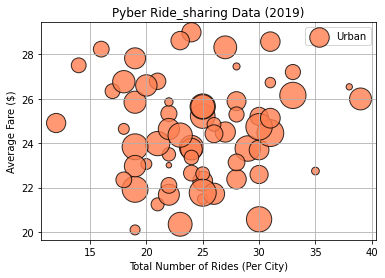

In [27]:
# Build scatterplot for cities: Urban
plt.scatter(urban_ride_count, urban_avg_fare, s = 10*urban_driver_count, c="coral", edgecolor="black",
           linewidths=1, alpha=0.8, label="Urban")
plt.title("Pyber Ride_sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

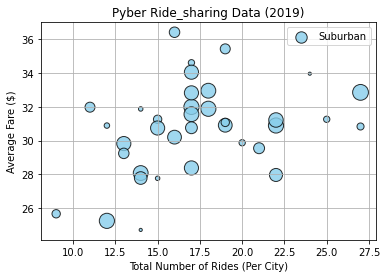

In [28]:
# Build scatterplot for cities: Suburban
plt.scatter(suburban_ride_count, suburban_avg_fare, s = 10*suburban_driver_count, c="skyblue", edgecolor="black",
           linewidths=1, alpha=0.8, label="Suburban")
plt.title("Pyber Ride_sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

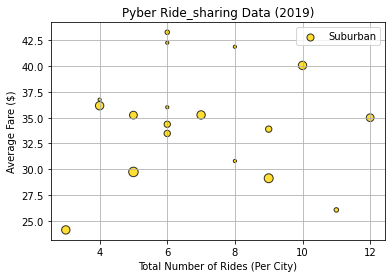

In [29]:
# Build scatterplot for cities: Rural
plt.scatter(rural_ride_count, rural_avg_fare, s = 10*rural_driver_count, c="gold", edgecolor="black",
           linewidths=1, alpha=0.8, label="Suburban")
plt.title("Pyber Ride_sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

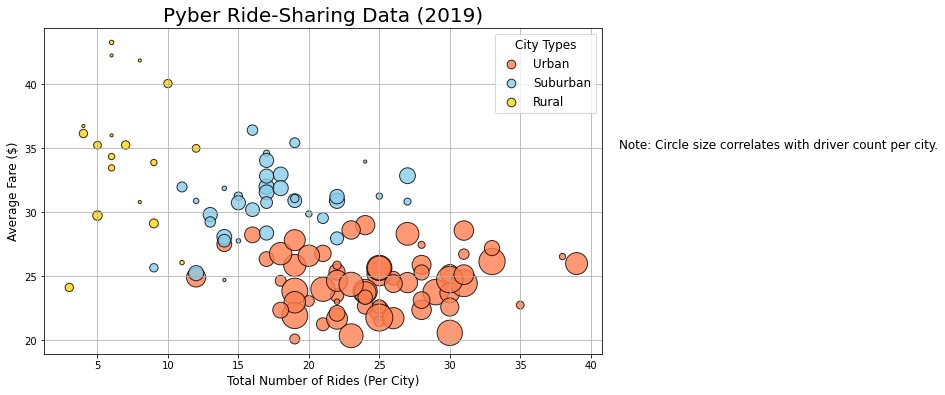

In [30]:
# Establish plot size
plt.subplots(figsize=(10,6))
# Build scatterplot for cities: Urban
plt.scatter(urban_ride_count, urban_avg_fare, s = 10*urban_driver_count, c="coral", edgecolor="black",
           linewidths=1, alpha=0.8, label="Urban")

# Build scatterplot for cities: Suburban
plt.scatter(suburban_ride_count, suburban_avg_fare, s = 10*suburban_driver_count, c="skyblue", edgecolor="black",
           linewidths=1, alpha=0.8, label="Suburban")

# Build scatterplot for cities: Rural
plt.scatter(rural_ride_count, rural_avg_fare, s = 10*rural_driver_count, c="gold", edgecolor="black",
           linewidths=1, alpha=0.8, label="Rural")
# Establish graph-wide properties
plt.title("Pyber Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
# Set up legend
lgnd = plt.legend(fontsize="12", mode="Expanded",scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes= [75]
lgnd.legendHandles[1]._sizes= [75]
lgnd.legendHandles[2]._sizes= [75]
lgnd.get_title().set_fontsize(12)

# Incorporate text label about circle size
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Save figure to Analysis folder
plt.savefig("Analysis/Fig1.png")
plt.show()

In [31]:
# Get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [32]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [33]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [34]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [35]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [36]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [37]:
# Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [38]:
# Calculate modal ride count for cities: Urban
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [39]:
# Calculate modal ride count for cities: suburban
suburban_ride_count.mode()

0    17
dtype: int64

In [40]:
# Calculate modal ride count for cities: rural
rural_ride_count.mode()

0    6
dtype: int64

In [41]:
# Calculate mean, median, mode for the ride count for cities: urban
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = stat.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.


StatisticsError: no unique mode; found 2 equally common values

In [42]:
# Calculate mean, median, mode for the ride count for cities: suburban
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = stat.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is 17.


In [43]:
# Calculate mean, median, mode for the ride count for cities: rural
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = stat.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is 6.


In [44]:
# Get fares for cities: urban
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [45]:
# Calculate MMM for average fare for cities: urban
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = stat.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is 22.86.


In [46]:
# Calculate MMM for average fare for cities: suburban
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = stat.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.


StatisticsError: no unique mode; found 4 equally common values

In [47]:
# Calculate MMM for average fare for cities: rural
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = stat.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.


StatisticsError: no unique mode; found 3 equally common values

In [48]:
# Get drivers for cities
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [49]:
# Calculate MMM for average drivers for cities: urban
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers for urban trips is {mean_urban_drivers}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers for urban trips is {median_urban_drivers}.")

mode_urban_drivers = stat.mode(urban_drivers)
print(f"The mode number of drivers for urban trips is {mode_urban_drivers}.")

# Calculate MMM for average drivers for cities: suburban
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers for suburban trips is {mean_suburban_drivers}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers for suburban trips is {median_suburban_drivers}.")

mode_suburban_drivers = stat.mode(suburban_drivers)
print(f"The mode number of drivers for suburban trips is {mode_suburban_drivers}.")

# Calculate MMM for average drivers for cities: rural
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers for rural trips is {mean_rural_drivers}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers for rural trips is {median_rural_drivers}.")

mode_rural_drivers = stat.mode(rural_drivers)
print(f"The mode number of drivers for rural trips is {mode_rural_drivers}.")

The mean number of drivers for urban trips is 36.67815384615385.
The median number of drivers for urban trips is 37.0.
The mode number of drivers for urban trips is 39.
The mean number of drivers for suburban trips is 13.712.
The median number of drivers for suburban trips is 16.0.
The mode number of drivers for suburban trips is 20.
The mean number of drivers for rural trips is 4.296.
The median number of drivers for rural trips is 4.0.
The mode number of drivers for rural trips is 1.


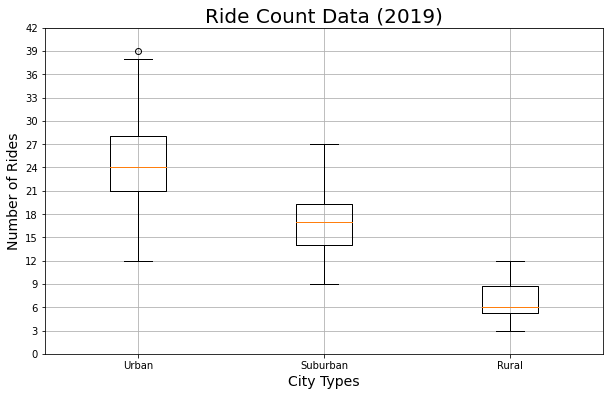

In [50]:
# Create box-and-whisker plot for city ride counts: urban
x_labels = ["Urban","Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))

# Add title, y-axis label and grid
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step = 3.0))
ax.grid()

# Save plot
plt.savefig("Analysis/Fig2.png")
plt.show()

In [51]:
# Find the 39-ride city
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

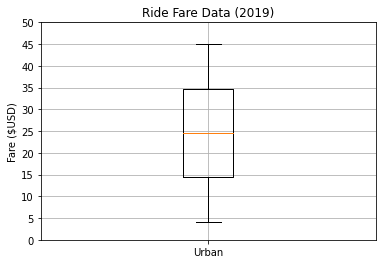

In [52]:
# Create fare box-and-whisker: urban
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add title, y-axis label, and grid.
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()
plt.show
print("Summary Statistics")
urban_fares.describe()

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

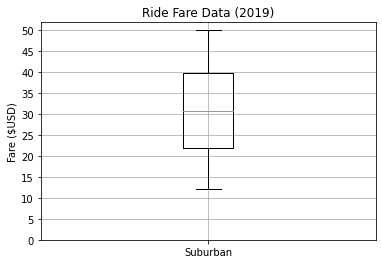

In [53]:
# Create fare box-and-whisker: suburban
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add title, y-axis label, and grid.
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()
plt.show
print("Summary Statistics")
suburban_fares.describe()

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

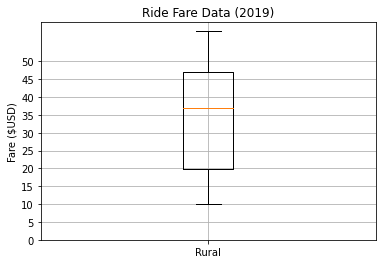

In [54]:
# Create fare box-and-whisker: rural
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add title, y-axis label, and grid.
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()
plt.show
print("Summary Statistics")
rural_fares.describe()

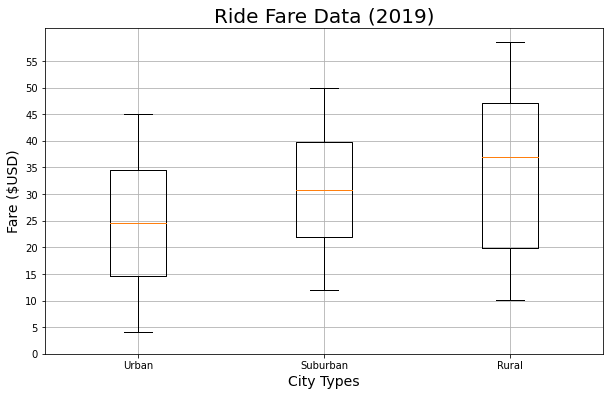

In [55]:
# Create box-and-whisker plot for combined city fare data
x_labels = ["Urban","Suburban","Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))

# Add title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step = 5.0))
ax.grid()

# Save plot
plt.savefig("Analysis/Fig3.png")
plt.show()

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

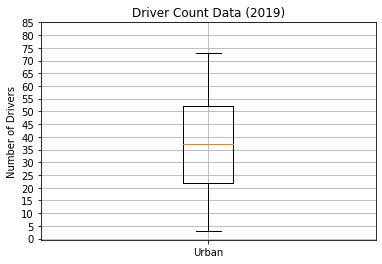

In [56]:
# Create driver box-and-whisker: urban
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)
# Add title, y-axis label, and grid.
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,90,step=5.0))
ax.grid()
plt.show
print("Summary Statistics")
urban_drivers.describe()

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

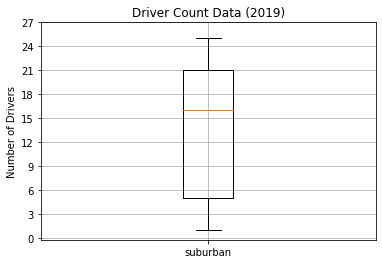

In [57]:
# Create driver box-and-whisker: suburban
x_labels = ["suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)
# Add title, y-axis label, and grid.
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,30,step=3.0))
ax.grid()
plt.show
print("Summary Statistics")
suburban_drivers.describe()

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

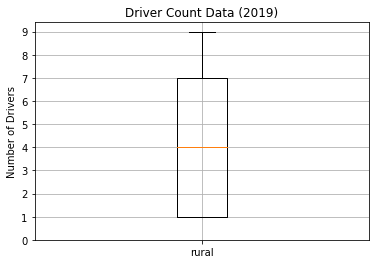

In [58]:
# Create driver box-and-whisker: rural
x_labels = ["rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)
# Add title, y-axis label, and grid.
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,10,step=1.0))
ax.grid()
plt.show
print("Summary Statistics")
rural_drivers.describe()

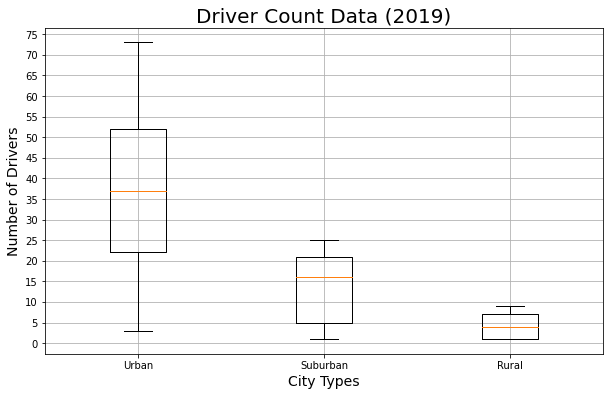

In [59]:
# Create box-and-whisker plot for combined city driver data
x_labels = ["Urban","Suburban","Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))

# Add title, y-axis label and grid
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(driver_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step = 5.0))
ax.grid()

# Save plot
plt.savefig("Analysis/Fig4.png")
plt.show()

In [60]:
# Sum fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [61]:
# Sum all fares
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [62]:
# Calculate fare percentage for each city type
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [63]:
# Perform last two cells in one line
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

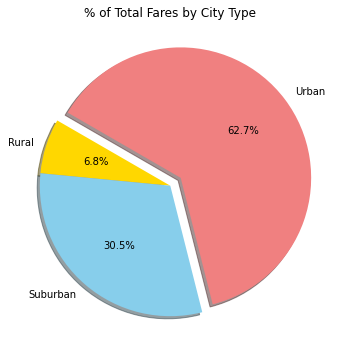

In [64]:
# Import mpl to change plot configurations
import matplotlib as mpl
# Make a pie chart from percentages
plt.subplots(figsize=(10,6))
plt.pie(type_percents, labels= ["Rural", "Suburban", "Urban"], colors=["gold", "skyblue", "lightcoral"], 
       explode = [0,0,0.1], autopct = '%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change default font size
mpl.rcParams['font.size'] = 14
# Save figure
plt.savefig('Analysis/Fig5.png')
# Show    
plt.show()

In [65]:
ride_percents = 100*pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

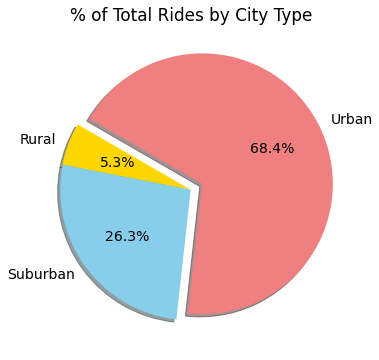

In [66]:
# Make a pie chart from percentages
plt.subplots(figsize=(10,6))
plt.pie(ride_percents, labels= ["Rural", "Suburban", "Urban"], colors=["gold", "skyblue", "lightcoral"], 
       explode = [0,0,0.1], autopct = '%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change default font size
mpl.rcParams['font.size'] = 14
# Save figure
plt.savefig('Analysis/Fig6.png')
# Show    
plt.show()

In [67]:
driver_percents = 100*city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

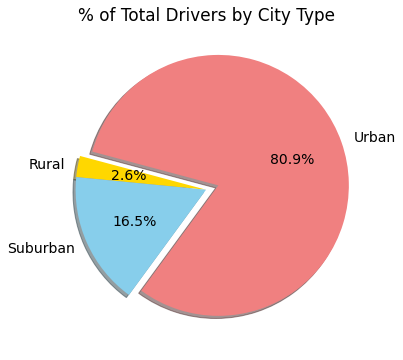

In [68]:
# Make a pie chart from percentages
plt.subplots(figsize=(10,6))
plt.pie(driver_percents, labels= ["Rural", "Suburban", "Urban"], colors=["gold", "skyblue", "lightcoral"], 
       explode = [0,0,0.1], autopct = '%1.1f%%', shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change default font size
mpl.rcParams['font.size'] = 14
# Save figure
plt.savefig('Analysis/Fig7.png')
# Show    
plt.show()